In [2]:
import pandas as pd

df = pd.read_csv('houseInfo.csv')

data = [house.split('|') for house in df.houseInfo]

result_data = []

for i in data:
    if len(i) > 6:
        result_data.append([i[0].strip() + ' & ' + i[1].strip(), i[2], i[3], i[4], i[5], i[6]])
    else:
        if len(i) < 6:
            i.append('Na')
        result_data.append(i)

houseInfo_split = pd.DataFrame(result_data, index=None, columns=['小区', '户型', '面积', '朝向', '装修', '电梯'])

In [3]:
houseInfo_split.head()

,小区,户型,面积,朝向,装修,电梯
0,泰华阳光海小区,4室2厅,115.8平米,西南,精装,Na
1,御龙居,3室2厅,121.63平米,东南,精装,Na
2,万科第五园八期,3室2厅,89平米,南,精装,Na
3,前海花园,2室1厅,68.09平米,南 北,精装,Na
4,玉湖湾,3室2厅,75.45平米,东南,精装,有电梯


In [4]:
data = [['星河时代   ', ' 叠拼别墅 ', ' 4室2厅 ', ' 219.43平米 ', ' 南 ', ' 精装 ', ' 无电梯'],
['星河时代   ', ' 联排别墅 ', ' 4室2厅 ', ' 288.83平米 ', ' 南 北 ', ' 其他 ', ' 无电梯'],
['十二橡树庄园二期   ', ' 联排别墅 ', ' 4室2厅 ', ' 211.01平米 ', ' 东南 ', ' 毛坯 ', ' 无电梯'],
['十二橡树庄园二期   ', ' 联排别墅 ', ' 4室2厅 ', ' 211.01平米 ', ' 东南 ', ' 毛坯 ', ' 无电梯']]

In [5]:
for i in data:
    print([i[0].strip() + ' * ' + i[1].strip()] + i[2:])

['星河时代 * 叠拼别墅', ' 4室2厅 ', ' 219.43平米 ', ' 南 ', ' 精装 ', ' 无电梯']
['星河时代 * 联排别墅', ' 4室2厅 ', ' 288.83平米 ', ' 南 北 ', ' 其他 ', ' 无电梯']
['十二橡树庄园二期 * 联排别墅', ' 4室2厅 ', ' 211.01平米 ', ' 东南 ', ' 毛坯 ', ' 无电梯']
['十二橡树庄园二期 * 联排别墅', ' 4室2厅 ', ' 211.01平米 ', ' 东南 ', ' 毛坯 ', ' 无电梯']


In [6]:
df = pd.merge(df, houseInfo_split, right_index=True, left_index=True)

In [7]:
df.head()

,title,houseInfo,flood,followInfo,totalPrice,unitPrice,tag,link,小区,户型,面积,朝向,装修,电梯
0,碧海明星大盘，南北通透，内庭院4房2卫,泰华阳光海小区 | 4室2厅 | 115.8平米 | 西南 | 精装,低楼层(共25层)2008年建板塔结合 - 碧海,45人关注 / 共22次带看 / 29天以前发布,790万,单价68222元/平米,距离11号线碧海湾站119米 | 房本满五年,https://sz.lianjia.com/ershoufang/105101135916...,泰华阳光海小区,4室2厅,115.8平米,西南,精装,Na
1,楼层好，前后双阳台格局，朝南 通风采光很好,御龙居 | 3室2厅 | 121.63平米 | 东南 | 精装,中楼层(共10层)2004年建板塔结合 - 西乡,82人关注 / 共108次带看 / 8个月以前发布,548万,单价45055元/平米,房本满五年 | 随时看房,https://sz.lianjia.com/ershoufang/105100760661...,御龙居,3室2厅,121.63平米,东南,精装,Na
2,南北朝向3+1户型，满五年，可以自己赎楼，看房方便,万科第五园八期 | 3室2厅 | 89平米 | 南 | 精装,中楼层(共18层)2009年建板塔结合 - 坂田,45人关注 / 共27次带看 / 25天以前发布,482万,单价54158元/平米,房本满五年,https://sz.lianjia.com/ershoufang/105101142028...,万科第五园八期,3室2厅,89平米,南,精装,Na
3,前海花园 端头位置 一梯两户 精装两房,前海花园 | 2室1厅 | 68.09平米 | 南 北 | 精装,中楼层(共5层)1998年建板塔结合 - 前海,197人关注 / 共80次带看 / 1个月以前发布,450万,单价66089元/平米,距离1号线(罗宝线）大新站364米 | 房本满五年 | 随时看房,https://sz.lianjia.com/ershoufang/105101084243...,前海花园,2室1厅,68.09平米,南 北,精装,Na
4,满五年业主自己赎楼相当于红本在手 全南格局,玉湖湾 | 3室2厅 | 75.45平米 | 东南 | 精装 | 有电梯,低楼层(共10层)2011年建板塔结合 - 碧海,43人关注 / 共55次带看 / 1个月以前发布,510万,单价67595元/平米,距离11号线碧海湾站1035米 | 房本满五年 | 随时看房,https://sz.lianjia.com/ershoufang/105101084092...,玉湖湾,3室2厅,75.45平米,东南,精装,有电梯


In [8]:
houseType = df.groupby('户型')['户型'].agg(len)

In [9]:
houseTypeList = []
for x,y in houseType.items():
    print(x.strip(), ": ", y)

1室0厅 :  23
1室1厅 :  115
1室2厅 :  3
2室1厅 :  577
2室2厅 :  356
3室1厅 :  398
3室2厅 :  809
3室3厅 :  1
4室1厅 :  87
4室2厅 :  429
4室3厅 :  11
5室1厅 :  27
5室2厅 :  108
5室3厅 :  11
6室1厅 :  4
6室2厅 :  27
6室3厅 :  3
6室4厅 :  1
7室1厅 :  1
7室2厅 :  4
7室3厅 :  1
8室3厅 :  1
9室2厅 :  1
独栋别墅 :  1
玖誉 :  1


In [10]:
list(dict(houseType.items()).keys())

[' 1室0厅 ',
 ' 1室1厅 ',
 ' 1室2厅 ',
 ' 2室1厅 ',
 ' 2室2厅 ',
 ' 3室1厅 ',
 ' 3室2厅 ',
 ' 3室3厅 ',
 ' 4室1厅 ',
 ' 4室2厅 ',
 ' 4室3厅 ',
 ' 5室1厅 ',
 ' 5室2厅 ',
 ' 5室3厅 ',
 ' 6室1厅 ',
 ' 6室2厅 ',
 ' 6室3厅 ',
 ' 6室4厅 ',
 ' 7室1厅 ',
 ' 7室2厅 ',
 ' 7室3厅 ',
 ' 8室3厅 ',
 ' 9室2厅 ',
 ' 独栋别墅 ',
 '玖誉  ']

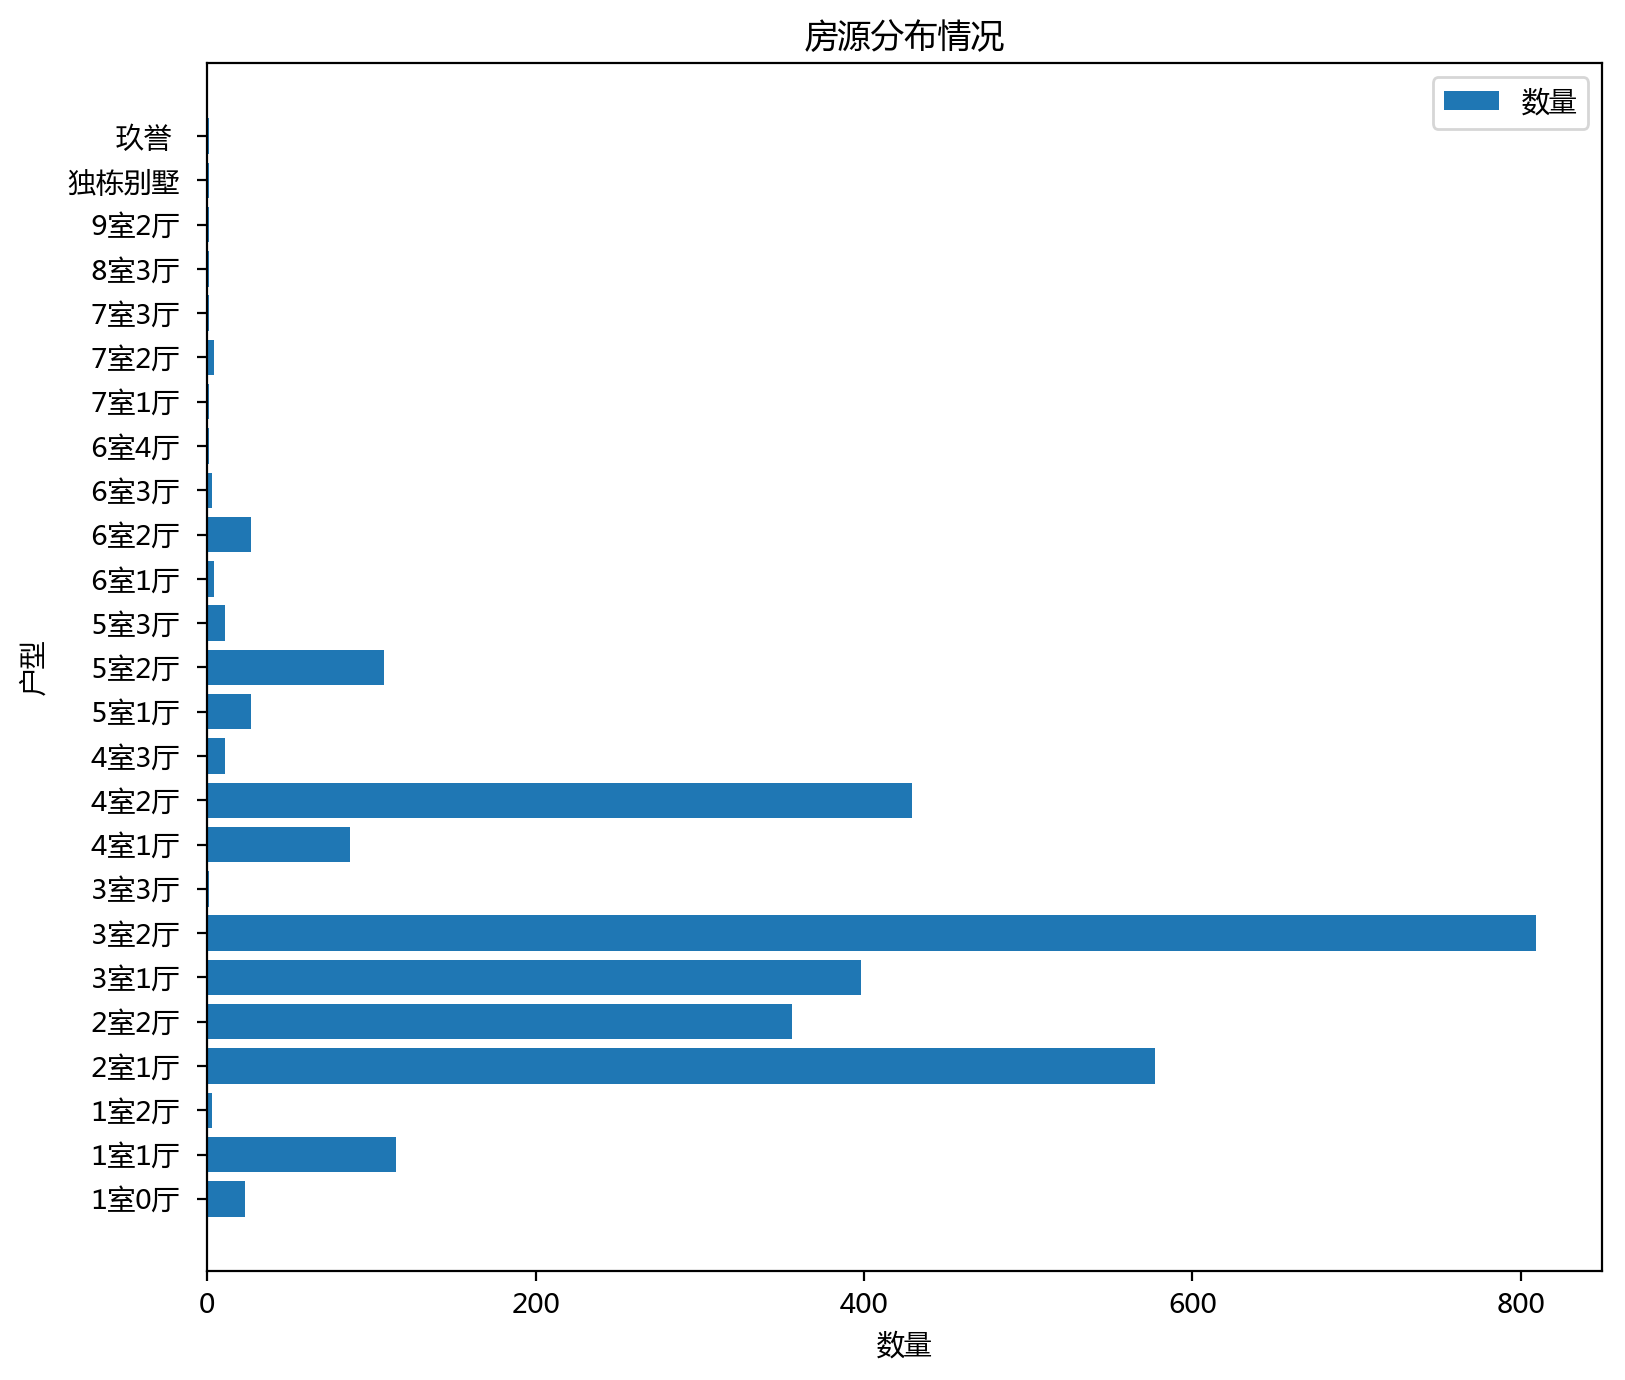

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
houseTypeData = dict(houseType.items())
result = tuple(houseTypeData.values())
label = tuple(houseTypeData.keys())
ind = np.arange(len(houseTypeData))
height = 0.8
plt.figure(figsize=(9,8),dpi=200)
p = plt.barh(ind, result, height)
plt.xlabel('数量')
plt.ylabel('户型')
plt.title('房源分布情况')
plt.xticks(np.arange(0, 1000, 200))
plt.yticks(ind, label)
plt.legend((p, ), ('数量', ))
plt.show()